<a href="https://colab.research.google.com/github/DIVYA14797/Machine-Learning/blob/main/Decision_Tree_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import the dataset and examine the variables. use descriptive statistics and visualization to understand the distribution and relation between the variables.

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

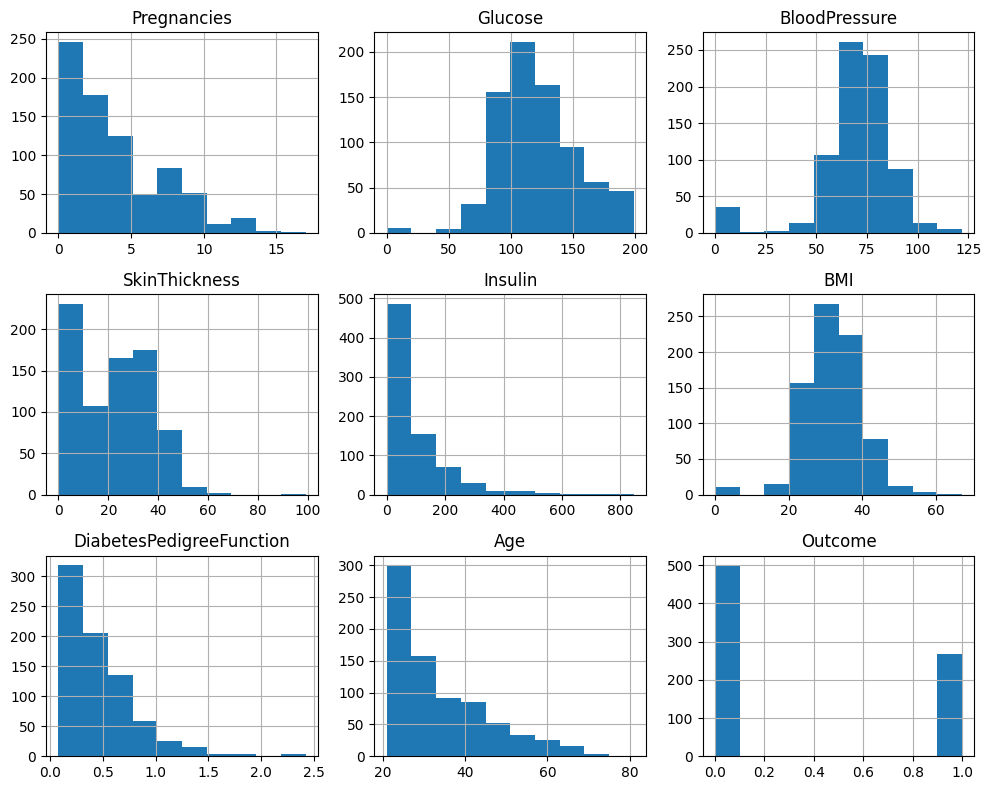

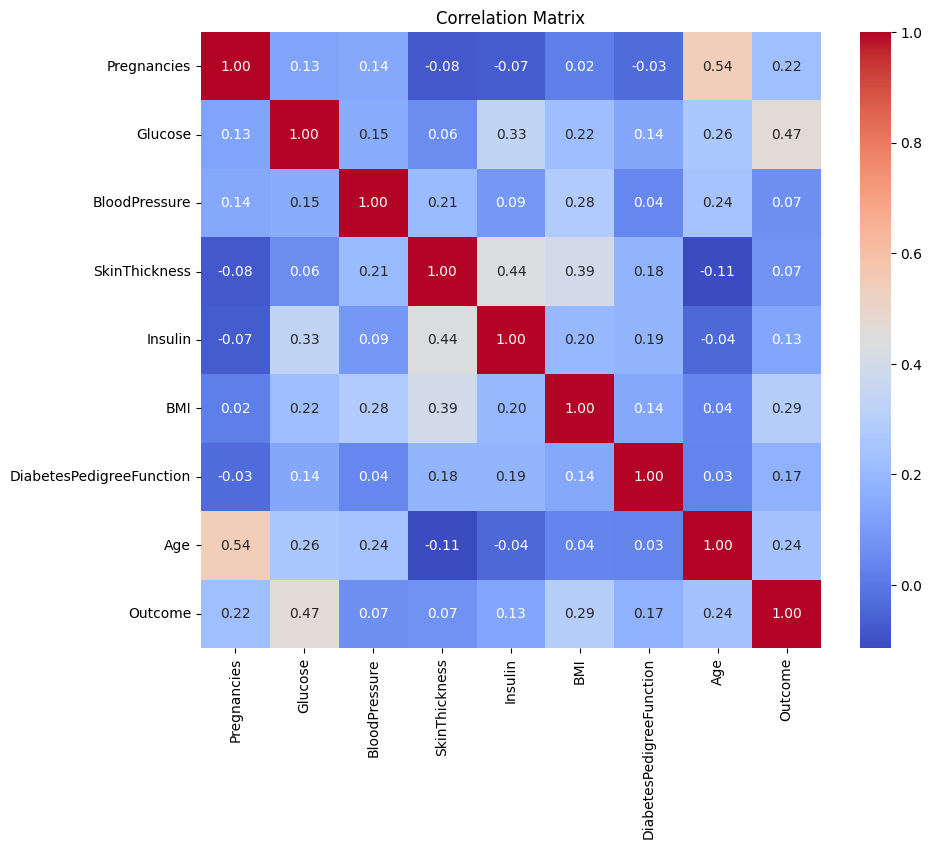

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

diabetes_data = pd.read_csv("diabetes.csv")

# Display the first few rows of the dataset to understand its structure
print(diabetes_data.head())

# Display information about the dataset, including data types and missing values
print(diabetes_data.info())

# Summary statistics of numerical variables
print(diabetes_data.describe())

# Visualize the distribution of numerical variables using histograms
diabetes_data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Visualize the correlation matrix using a heatmap
corr_matrix = diabetes_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.0000

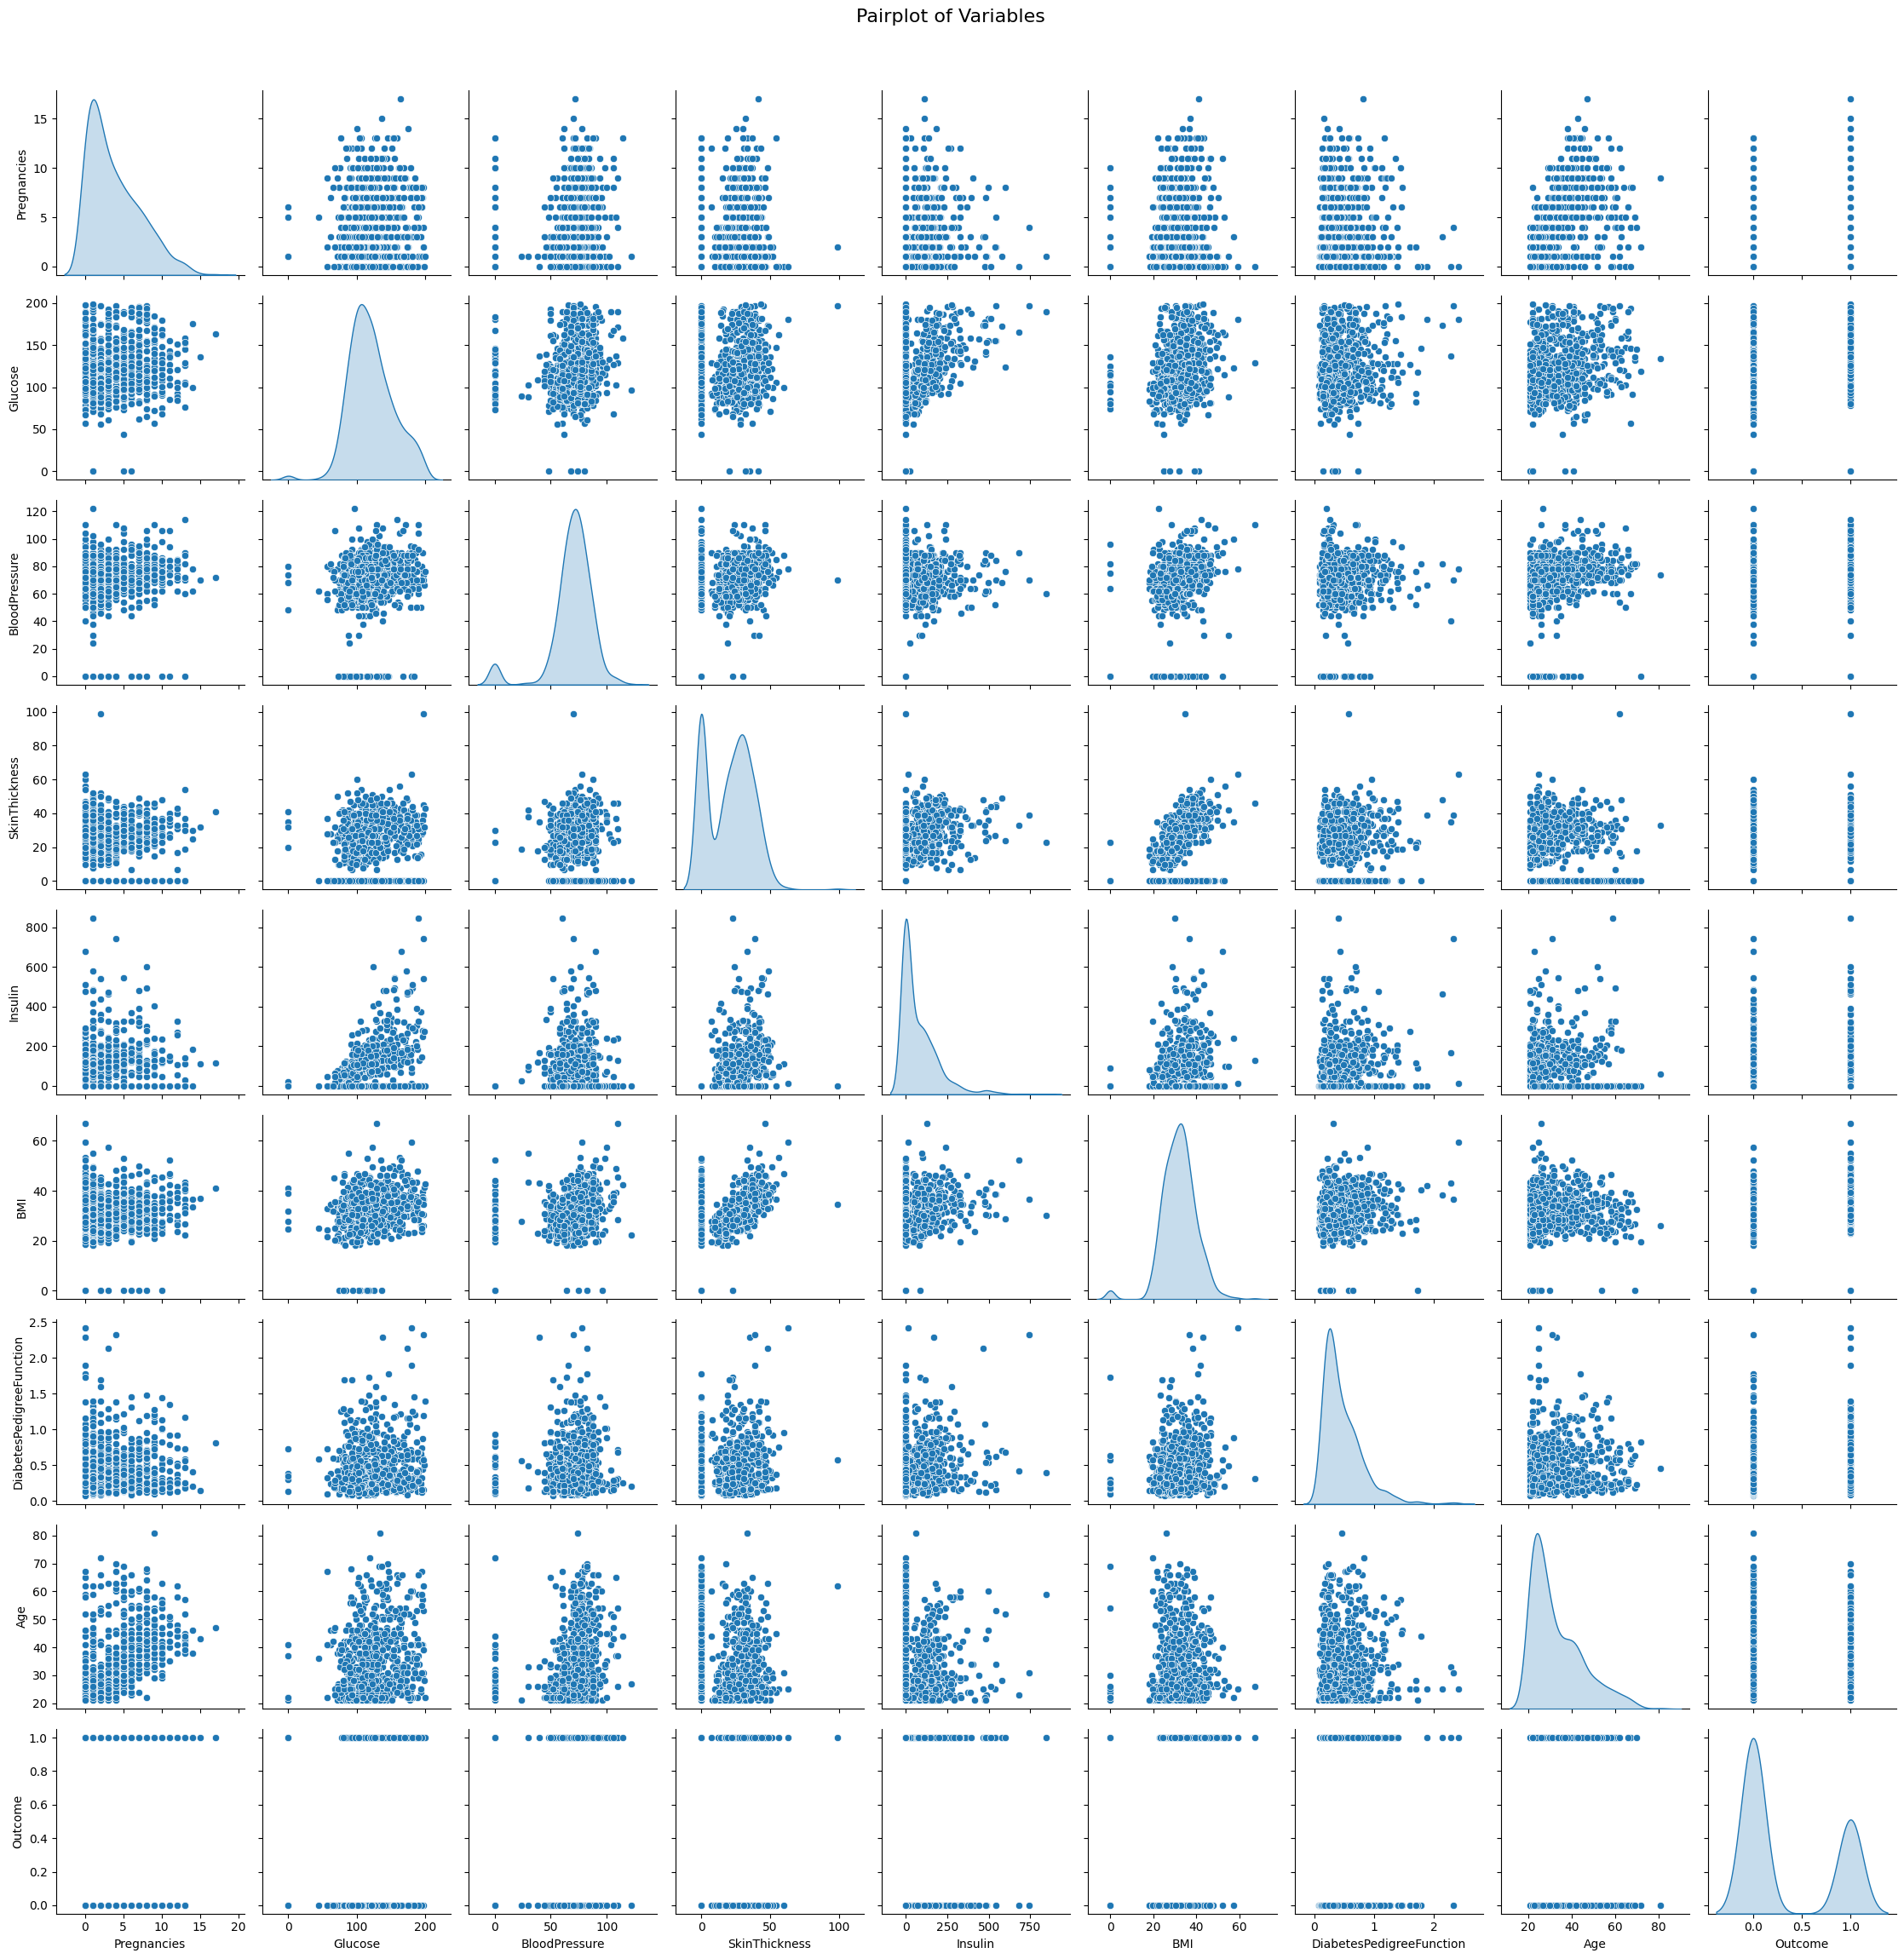

In [ ]:
# Display summary statistics of numerical variables
print("Summary Statistics:")
print(diabetes_data.describe())

# Visualize the relationship between variables using pairplot
sns.pairplot(diabetes_data, diag_kind='kde')
plt.suptitle("Pairplot of Variables", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

2. Preprocess the data by cleaning missing values , removing outliers and transforming categorical variables if necessary.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Handling missing values
# Replace missing values (0) with NaN in columns ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = \
    diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

# Define the imputer to use median strategy for missing values
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the numerical columns and transform the data
diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = \
    imputer.fit_transform(diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])


In [ ]:
# Remove outliers using IQR method (optional)
# Example:
Q1 = diabetes_data.quantile(0.25)
Q3 = diabetes_data.quantile(0.75)
IQR = Q3 - Q1
diabetes_data = diabetes_data[~((diabetes_data < (Q1 - 1.5 * IQR)) | (diabetes_data > (Q3 + 1.5 * IQR))).any(axis=1)]


3. Split the dataset into a training set and a test set . Use a random seed to ensure reproducibility.

In [ ]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target variable (y)
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (162, 8) (162,)
Test set shape: (41, 8) (41,)


This ensures that the dataset is split into a training set and a test set in a reproducible manner, which is important for evaluating the performance of machine learning models.


4. Use a decision tree algorithm , such as D3 or C4.5 , to train a decision tree model on training set . Use cross validation to optimize the hyperparameters and avoid overfitting .



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Score: 0.6785984848484848


5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy , precision , recall , and F1 score .Use confusion matrices and ROC curves to visualize the results.

Accuracy: 0.6585365853658537
Precision: 0.5
Recall: 0.42857142857142855
F1 Score: 0.4615384615384615


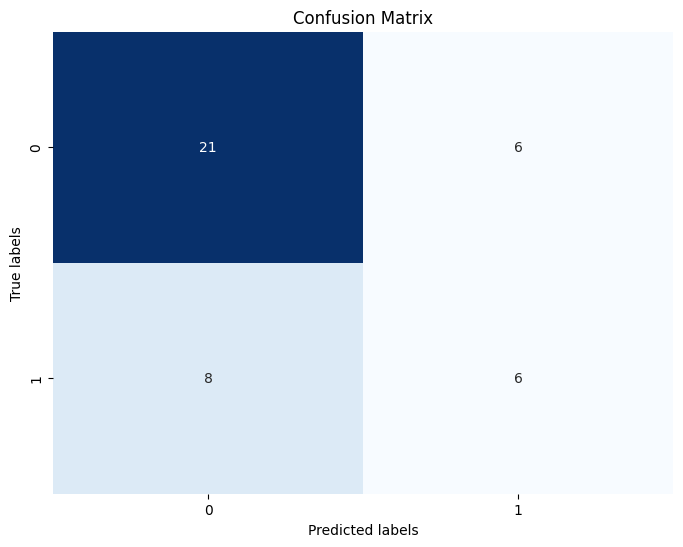

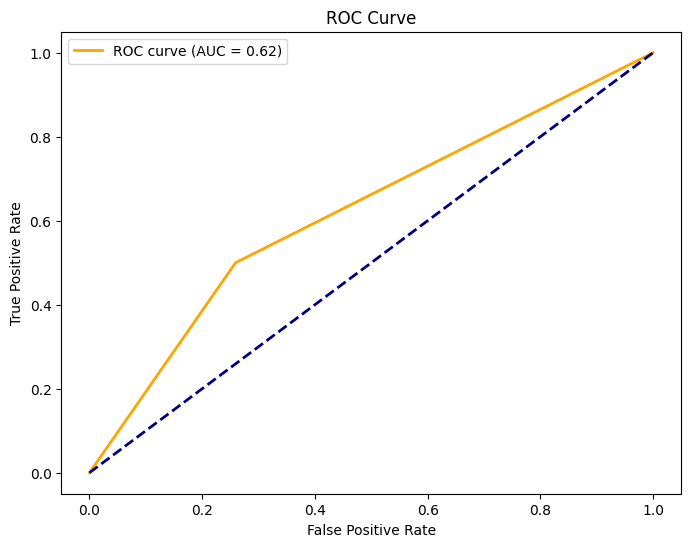

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

# Get the best decision tree model from GridSearchCV
best_dt_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_dt_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC curve
y_prob = best_dt_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

6. Interpret the decision tree by examining the splits, branches and leaves . Identify the most important variables and their thresholds . Use domain knowledge and common sense to explain the patterns and trends .

To interpret the decision tree model, we'll examine its splits, branches, and leaves to identify the most important variables and their thresholds. We'll also use domain knowledge and common sense to explain the patterns and trends observed in the model.

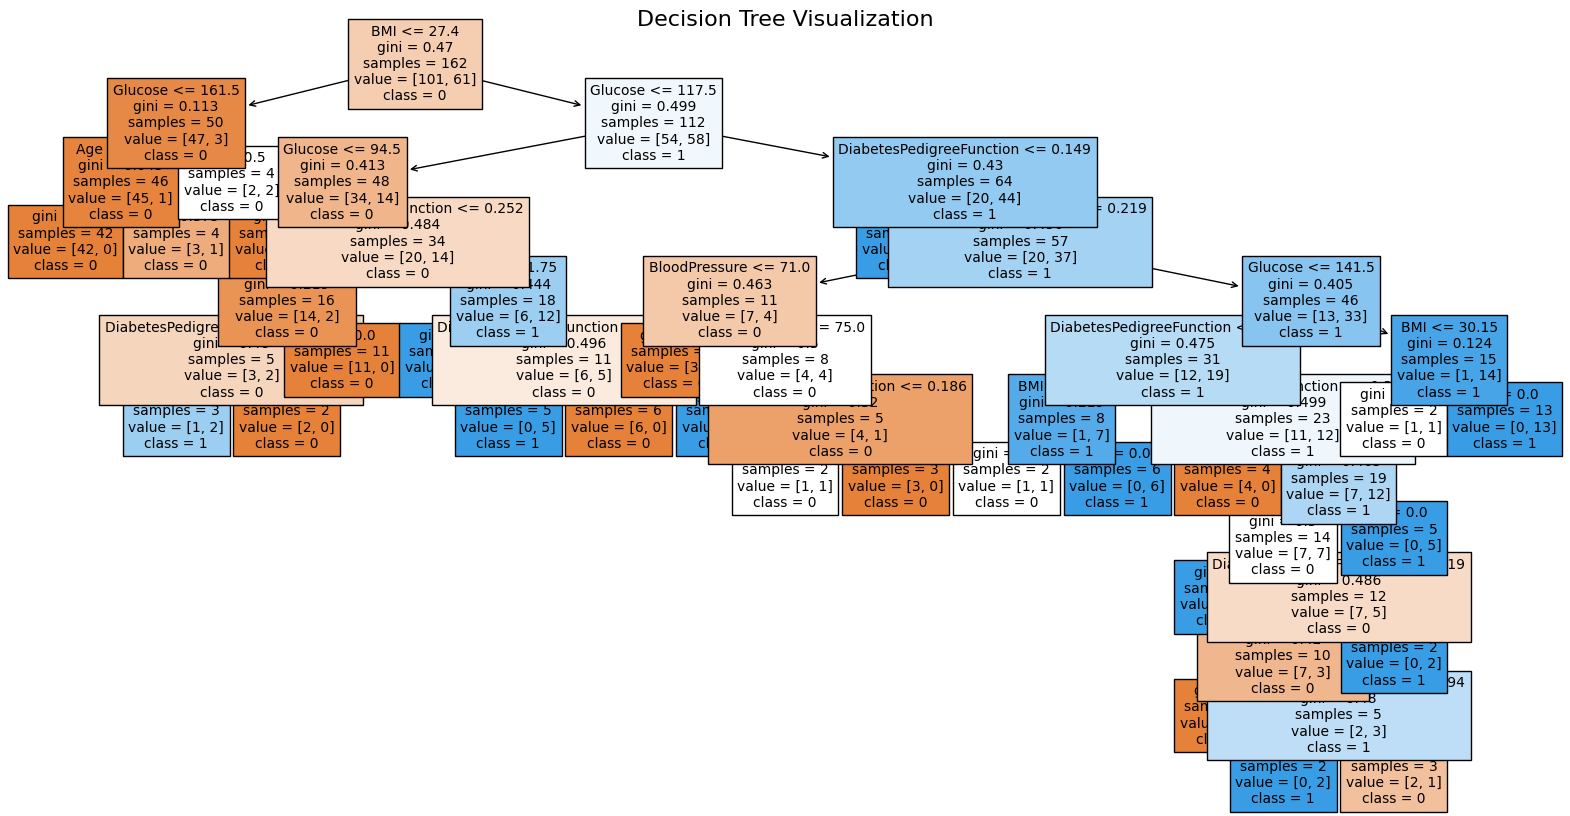

In [ ]:
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt_model, feature_names=X.columns, class_names=['0', '1'], filled=True, fontsize=10)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()


This code will visualize the decision tree model, showing the splits, branches, and leaves. The feature names are displayed along with the thresholds for each split.

After visualizing the decision tree, we can interpret it by examining the following:

1. Root Node:

* The root node represents the first split in the decision tree.
* It shows the most important variable for making the initial decision.

2. Internal Nodes:

* Internal nodes represent subsequent splits based on different features.
* Each internal node shows the variable and threshold used for the split.

3. Leaf Nodes:

* Leaf nodes represent the final decision or classification.
* They show the predicted class (0 or 1) based on the majority class of the samples that reach that node.

7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment . Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

To validate the decision tree model and test its robustness, we can apply it to new data, introduce changes to the dataset or environment, and conduct sensitivity analysis and scenario testing to explore uncertainty and risks. Here's how we can proceed:

1. Apply the Model to New Data:

* Use the trained decision tree model to make predictions on new or unseen data that was not used during training or testing. This helps assess the model's performance in real-world scenarios.

2. Introduce Changes to the Dataset:

* Introduce changes to the dataset, such as adding noise, outliers, or missing values, to evaluate the model's robustness to variations in the data.
* Assess how changes affect the model's performance and whether it remains stable and reliable.

3. Conduct Sensitivity Analysis:

* Conduct sensitivity analysis by varying input variables within a plausible range and observing the impact on model predictions.
* Identify which variables have the greatest influence on the model's output and assess the model's sensitivity to changes in these variables.

4. Scenario Testing:

* Explore different scenarios or hypothetical situations to test the model's performance under various conditions.
* For example, simulate different patient profiles in the context of medical diagnosis or different market conditions in financial forecasting.

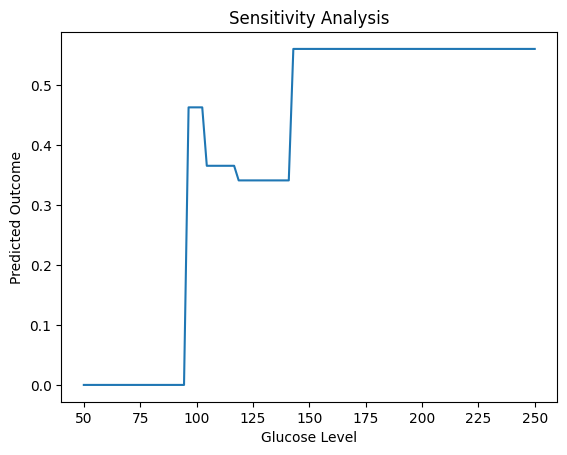

In [ ]:
 #1. Apply the model to new data

y_pred_new = best_dt_model.predict(X_train)

# 2. Introduce changes to the dataset
# Example: Add noise to a feature
 X_noisy = X_test.copy()
# X_noisy['Glucose'] += np.random.normal(0, 5, size=len(X_noisy['Glucose']))

# 3. Conduct sensitivity analysis
# Example: Varying glucose levels and observing the impact on predictions
 glucose_values = np.linspace(50, 250, 100)
 predictions = []
 for glucose in glucose_values:
     X_sensitivity = X_test.copy()
     X_sensitivity['Glucose'] = glucose
     y_pred_sensitivity = best_dt_model.predict(X_sensitivity)
     predictions.append(y_pred_sensitivity.mean())

# 4. Scenario testing
# Example: Simulate different patient profiles
# For instance, test the model's performance for patients with different age, BMI, and glucose levels.

 #Visualize sensitivity analysis
 plt.plot(glucose_values, predictions)
 plt.xlabel('Glucose Level')
 plt.ylabel('Predicted Outcome')
 plt.title('Sensitivity Analysis')
 plt.show()